![google_play](google_play.png)


## Steps:

1-Read CSV with PySpark

2-Importing libraries

3-load the Data

4-Description of Data

5-Cleaning the Data

6-Top 10 Highest rating Apps in google play store in terms of categories

7-Number of Application in terms of Category

8-Top 10 apps which has more downloads

9-Which 10 apps from the 'FAMILY' category are having the lowest rating and highest rating.

10-Free and Paid Apps

11-Relation between app category and app price

12-Filter out "junk" apps

13-Sentiment analysis of user reviews

## Read CSV with PySpark

In [1]:
import pyspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark=SparkSession.builder.appName('LoadData').getOrCreate()

In [4]:
file_path='/home/bigdata/Desktop/task/googleplaystore-1.csv'

In [5]:
df = spark.read.option("header", "true").csv(file_path)

In [6]:
df.show()

+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+------------------+------------------+------------+
|                 App|      Category|Rating|Reviews|Size|   Installs|Type|Price|Content Rating|              Genres|      Last Updated|       Current Ver| Android Ver|
+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+------------------+------------------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159| 19M|    10,000+|Free|    0|      Everyone|        Art & Design|   January 7, 2018|             1.0.0|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967| 14M|   500,000+|Free|    0|      Everyone|Art & Design;Pret...|  January 15, 2018|             2.0.0|4.0.3 and up|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510|8.7M| 5,000,000+|Free|    0|      Everyone|        Art & Design|    August 1, 2018|             1.2.4|4.0.3 

## Importing the libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

## Convert Spark DataFrame to Pandas

In [8]:
data = df.toPandas()

In [9]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Main Dataset
This file contains data on the Google Play applications. It has 10,841 rows of data with the following columns:

App : Name of the app

Category: Category of the app. This could be beauty, business, entertainment, education...etc.

Rating: How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.

Reviews: The number of user reviews each app has received.

Size: The memory size needed to install the application.

Installs: The number of times each application has been installed by users.

Type: Whether the app is free or a paid app.

Price: The price of the app.

Content Rating: This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.

Genres: The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example.

Last Updated: Release date of the most recent update for the app.

Current Ver: The app's current version.

Android Ver: The oldest version of Android OS supported by the app.

## Descripton of Data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null object
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10841 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10840 non-null object
Android Ver       10840 non-null object
dtypes: object(13)
memory usage: 1.1+ MB


In [11]:
data.describe()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10841,10841,10841,10840,10841,10841,10840,10840
unique,9660,36,43,6002,464,24,6,95,8,121,1379,2835,36
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,1474,596,1694,1578,10037,10038,8713,842,326,1458,2450


In [12]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       1
Android Ver       1
dtype: int64

## Cleaning the Data Frame

In [13]:
data['Reviews'].unique()


array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [14]:
data['Reviews']=pd.to_numeric(data['Reviews'],errors='coerce')

errors=’coerce’. It will replace all non-numeric values with NaN.

## Fix the Size

In [15]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [16]:
def fix_size(s):
    try:
        if s.endswith('M'):
            return float(s[:-1])
        
        elif s.endswith('k'):
            return (float(s[:-1])/1024)
        
        elif s == '1,000+' :
            return 1.0
        
        else:
            return np.nan
        
    except:
        
        return np.nan
            

In [17]:
fix_size('98M')

98.0

In [18]:
fix_size('100k')

0.09765625

In [19]:
fix_size('demo')

nan

In [20]:
fix_size('1020k')

0.99609375

In [21]:
data['Size']=data['Size'].apply(fix_size)

In [22]:
data['Size'].unique()

array([1.90000000e+01, 1.40000000e+01, 8.70000000e+00, 2.50000000e+01,
       2.80000000e+00, 5.60000000e+00, 2.90000000e+01, 3.30000000e+01,
       3.10000000e+00, 2.80000000e+01, 1.20000000e+01, 2.00000000e+01,
       2.10000000e+01, 3.70000000e+01, 2.70000000e+00, 5.50000000e+00,
       1.70000000e+01, 3.90000000e+01, 3.10000000e+01, 4.20000000e+00,
       7.00000000e+00, 2.30000000e+01, 6.00000000e+00, 6.10000000e+00,
       4.60000000e+00, 9.20000000e+00, 5.20000000e+00, 1.10000000e+01,
       2.40000000e+01,            nan, 9.40000000e+00, 1.50000000e+01,
       1.00000000e+01, 1.20000000e+00, 2.60000000e+01, 8.00000000e+00,
       7.90000000e+00, 5.60000000e+01, 5.70000000e+01, 3.50000000e+01,
       5.40000000e+01, 1.96289062e-01, 3.60000000e+00, 5.70000000e+00,
       8.60000000e+00, 2.40000000e+00, 2.70000000e+01, 2.50000000e+00,
       1.60000000e+01, 3.40000000e+00, 8.90000000e+00, 3.90000000e+00,
       2.90000000e+00, 3.80000000e+01, 3.20000000e+01, 5.40000000e+00,
      

In [23]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Fix the Price

In [24]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49',
       'Varies with device', '$1.70', '$8.99', '$2.00', '$3.88', '$25.99',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$5.00', '$13.99',
       '$299.99', '$379.99', '$37.99', '$18.99', '$389.99', '$19.90',
       '$8.49', '$1.75', '5.0M', '$14.00', '$4.85', '$46.99', '$109.99',
       '$154.99', '$3.08', '$2.59', '$4.80', '$1.96', '$19.40', '$3.90',
       '$4.59', '$15.46', '$3.04', '$4.29', '$2.60', '$3.28', '$4.60',
       '$28.99', '$2.95', '$2.90', '$1.97', '$200.00', '$89.99', '$2.56',
       '$30.99', '$3.61', '$394.99', '$1.26', 'Everyone', '$1.20',


In [25]:
def fix_price(p):
    try :
        
        if p.startswith('$'):
            return float(p[1:])
        
        else:
            return 0.0
        
    except :
        
        return np.nan

In [26]:
fix_price('$90')

90.0

In [27]:
fix_price(' ')

0.0

In [28]:
fix_price('free')

0.0

In [29]:
data['Price']=data['Price'].apply(fix_price)

In [30]:
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [31]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Fix the Category

In [32]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       ' traffic jams', 'Face', '1.9'], dtype=object)

In [33]:
def lower_categroy (c):
    return c.title()

In [34]:
lower_categroy('CLASH_OF_CLANS')

'Clash_Of_Clans'

In [35]:
data['Category']=data['Category'].apply(lower_categroy)

In [36]:
data['Category'].unique()

array(['Art_And_Design', 'Auto_And_Vehicles', 'Beauty',
       'Books_And_Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food_And_Drink', 'Health_And_Fitness', 'House_And_Home',
       'Libraries_And_Demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel_And_Local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video_Players', 'News_And_Magazines', 'Maps_And_Navigation',
       ' Traffic Jams', 'Face', '1.9'], dtype=object)

## Fix the Installs

In [37]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '4.4', '0+', '4.2', '0', 'Free'], dtype=object)

In [38]:
data['Installs']=data.Installs.str.replace(',','')

In [39]:
data['Installs']=data['Installs'].str.replace('+','')

In [40]:
data['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '4.4', '0', '4.2',
       'Free'], dtype=object)

In [41]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,Art_And_Design,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Fix the Android ver

In [42]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', 'Maps & Navigation',
       '2.0.1 and up', '4.1 - 7.1.1', 'NaN', 'Health & Fitness',
       '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1', '5.0 - 7.1.1', None],
      dtype=object)

In [43]:
def fix_ver(v):
    
    try:
        if v == 'Varies with device':
            return np.nan
        
        elif v == '4.4W and up' :
            return v.replace('w','')
        else :
            return v
    except :
        return v

In [44]:
data['Android Ver'] =data['Android Ver'].apply(fix_ver)

In [45]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up', nan,
       '2.2 and up', '5.0 and up', '6.0 and up', '1.6 and up',
       '1.5 and up', '2.1 and up', '7.0 and up', '5.1 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '7.1 and up', '7.0 - 7.1.1', '8.0 and up',
       '5.0 - 8.0', '3.1 and up', 'Maps & Navigation', '2.0.1 and up',
       '4.1 - 7.1.1', 'NaN', 'Health & Fitness', '5.0 - 6.0',
       '1.0 and up', '2.2 - 7.1.1', '5.0 - 7.1.1', None], dtype=object)

## Fix the Updated

In [46]:
data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [47]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce')

data = data.dropna(subset=['Last Updated'])

data.loc[:,'Last Updated'] = data['Last Updated'].dt.strftime('%Y-%m-%d')

In [48]:
data['Last Updated'].unique()

array(['2018-01-07', '2018-01-15', '2018-08-01', ..., '2014-01-20',
       '2014-02-16', '2014-03-23'], dtype=object)

## Top 10 Highest rating Apps in google play store in terms of categories

In [49]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')


In [50]:
top_rating = data.sort_values(['Rating'], ascending=False)[['App', 'Category', 'Rating']].head(11)


In [51]:
top_rating

,App,Category,Rating
9056,Santa's Monster Shootout DX,Game,5.0
8395,DG TV,News_And_Magazines,5.0
8493,PK and DK Audio App,Family,5.0
6330,HON. B.J. ACS COLLEGE ALE,Family,5.0
6342,BJ Foods,Business,5.0
6363,Read it easy for BK,Lifestyle,5.0
9766,ER Assist,Productivity,5.0
6364,BK Video Status,Family,5.0
6372,BK Formula Calculator,Tools,5.0
6375,Dr Bk Sachin bhai,Lifestyle,5.0


## Number of Application in terms of Rating

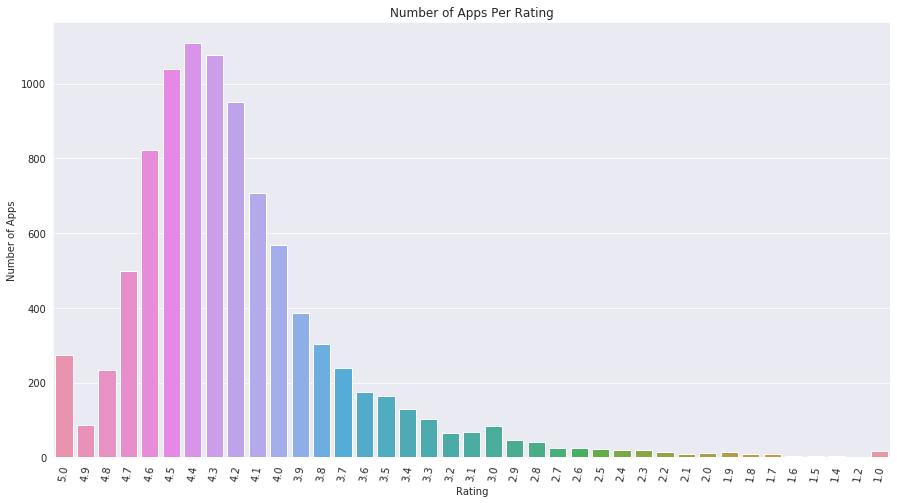

In [52]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 8))
sns.countplot(x='Rating', data=data)
plt.title('Number of Apps Per Rating')
plt.xticks(rotation=80)
plt.ylabel('Number of Apps')
plt.gca().invert_xaxis()
plt.show()

## Number of Application in terms of Category


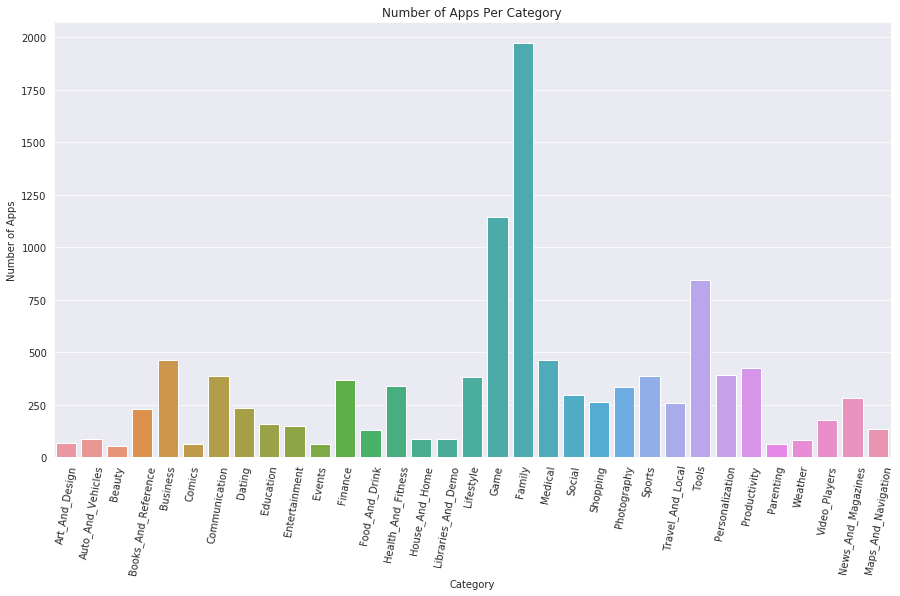

In [53]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.countplot(x='Category',data=data)
plt.title('Number of Apps Per Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=80)
plt.show()

## Top 10 apps which has more downloads

In [54]:
downloads=data.sort_values('Installs',ascending=False)

In [55]:
top_downloads=downloads.loc[:,['App','Installs','Category']]

In [56]:
top_downloads.head(11)

,App,Installs,Category
3879,Pou,500000000,Family
3473,Dropbox,500000000,Productivity
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",500000000,Tools
465,imo free video calls and chat,500000000,Communication
467,Viber Messenger,500000000,Communication
474,LINE: Free Calls & Messages,500000000,Communication
347,imo free video calls and chat,500000000,Communication
1966,Candy Crush Saga,500000000,Game
4365,MX Player,500000000,Video_Players
1759,Temple Run 2,500000000,Game


## Which 10 apps from the 'FAMILY' category are having the lowest rating and highest rating

In [57]:
lr=data[data['Category'] == 'Family']
lower_rating=lr.sort_values(by=['Rating'], ascending=True)

In [58]:
family_lower_rating=lower_rating.loc[:,['App','Rating','Installs','Category']]

In [59]:
family_lower_rating.head(11)

,App,Rating,Installs,Category
5978,Truck Driving Test Class 3 BC,1.0,50,Family
10324,FE Mechanical Engineering Prep,1.0,1000,Family
4127,Speech Therapy: F,1.0,10,Family
4905,AC REMOTE UNIVERSAL-PRO,1.6,100000,Family
6135,BG TV App,1.7,100,Family
9176,EB Mobile,1.7,10000,Family
6812,Boston University Alumni,1.8,1000,Family
4904,Smart-AC Universal Remote Free,1.8,500000,Family
9890,TAXLANDIA,1.9,1000,Family
7416,CJ Fallon eBook Reader,1.9,5000,Family


##  Highest rating

In [60]:
tr=data[data['Category'] == 'Family']
top_rating=tr.sort_values(by=['Rating'], ascending=False)
family_top_rating=top_rating.loc[:,['App','Rating','Installs','Category']]
family_top_rating.head(11)

,App,Rating,Installs,Category
10837,Fr. Mike Schmitz Audio Teachings,5.0,100,Family
9531,Lyrics of Ek Paheli Leela,5.0,500,Family
7320,CG - Chemistry free,5.0,1000,Family
7307,CG FM,5.0,500,Family
7239,CF Life,5.0,100,Family
5246,Hey AJ! It's Bedtime!,5.0,10,Family
9496,Master E.K,5.0,1000,Family
9503,Pyaar Ek Dhoka,5.0,50,Family
7212,MCQ CE IT,5.0,1000,Family
7204,TI-84 CE Graphing Calculator Manual TI 84,5.0,100,Family


## FREE AND PAID APPS


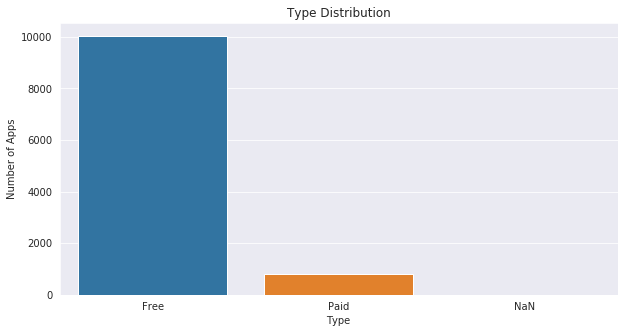

In [61]:
plt.figure(figsize=(10, 5))
sns.countplot(data['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

In [62]:
data['Type'].value_counts()

Free    10037
Paid      800
NaN         1
Name: Type, dtype: int64

In [63]:
data['Type'] = data['Type'].astype('category')


In [64]:
data['Type'] = data['Type'].replace('NaN', np.nan).str.strip()

In [65]:
data = data.dropna(subset=['Type'])

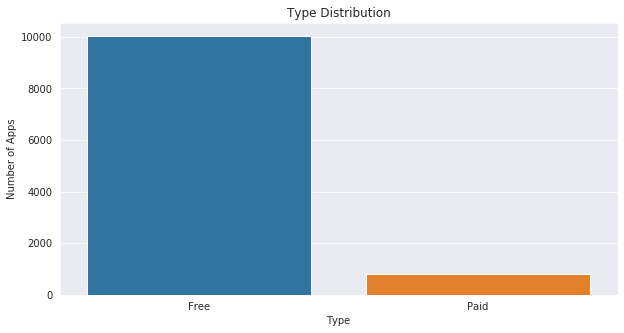

In [66]:
plt.figure(figsize=(10, 5))
sns.countplot(data['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()


## Relation between app category and app price#


Text(0.5, 1.0, 'App pricing trend across categories')

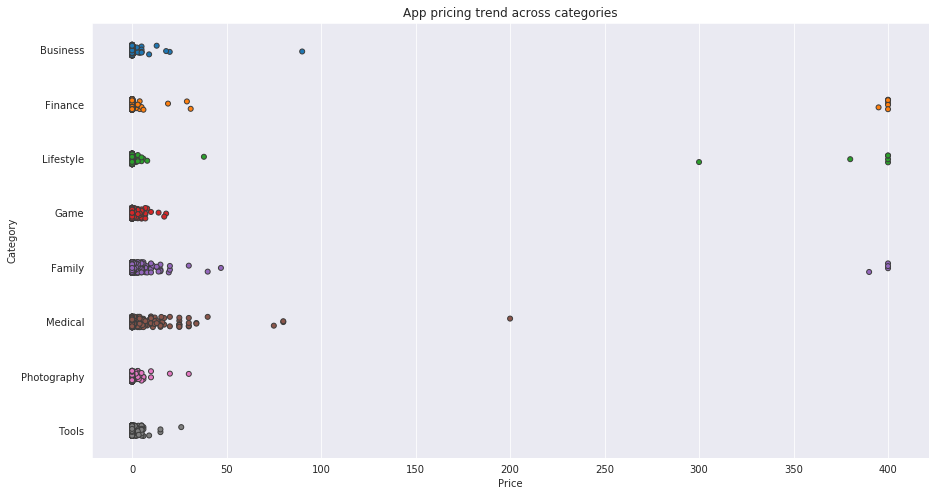

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

popular_app_cats = data[data.Category.isin(['Game', 'Family', 'Photography',
                                            'Medical', 'Tools', 'Finance',
                                            'Lifestyle','Business'])]

ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

## Filter out "junk" apps


Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

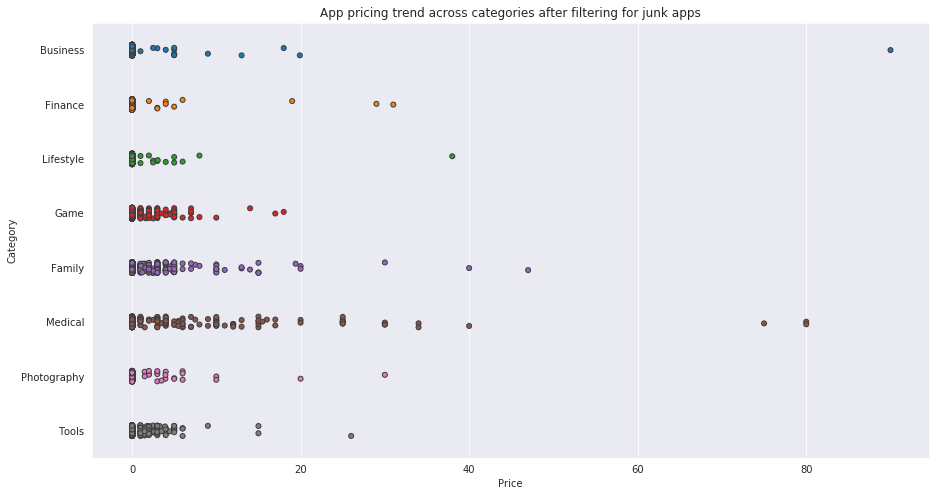

In [68]:
apps_under_100 = popular_app_cats[popular_app_cats["Price"]<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x = "Price", y ="Category", data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')